Input the recovery time, *note that 200 works well*: 200
It took 708 loops to infect everyone.


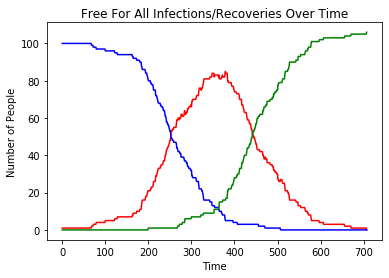

In [9]:
#part three
import random
from random import randrange
import numpy as np
import matplotlib.pyplot as plt

#define information about each dot
width=700;
height=700
radius = 6 #keep this small or else the animation glitches 
velocity=3 #Make this 3 or under or else the animation glitches.
N=100 #number of initially uninfected dots
rec_time=int(input('Input the recovery time, *note that 200 works well*: '))

#set initial positions and velocities
def getInitialInfo():
    #x and y positions are randomly determined and made a vector
    xposition=random.randrange(0,width)
    yposition=random.randrange(0,height)
    pos=[xposition,yposition]
    #a velocity angle is chosen and x and y velocities determined
    angle=random.uniform(0,2*np.pi)
    xvelocity=velocity*np.cos(angle)
    yvelocity=velocity*np.sin(angle)
    vel=[xvelocity,yvelocity]
    
    return pos,vel

#initialize empty vectors to store position and velocity information
uninfected=[]
infected=[]
recovered=[]
newinfected=[]
newrecovered=[]
igraph=[]
rgraph=[]
ugraph=[]

#Create initial uninfected dots
for i in range(N):
    pos,vel=getInitialInfo()
    name=i+1
    time_inf=0
    uninfected.append([pos,vel,name,time_inf])

#create the first infected dot
p,v=getInitialInfo()
name1=N+1
time_inf=0
infected.append([p,v,name1,time_inf])

#initialize count
counter=0

#loop continuously if the simulation is not paused
done=False
while not done:
    
    #uninfected dots
    for i in range(len(uninfected)):
    
        #update the position of the dot
        uninfected[i][0][0]+=int(np.round(uninfected[i][1][0]))
        uninfected[i][0][1]+=int(np.round(uninfected[i][1][1]))
        
        #bounce the dot off the walls
        if uninfected[i][0][0]>=700 or uninfected[i][0][0]<=0:
            uninfected[i][1][0]*=-1
        if uninfected[i][0][1]>=700 or uninfected[i][0][1]<=0:
            uninfected[i][1][1]*=-1
        
        #Check if the uninfected dot hit an infected dot and make it become infected
        for j in range(len(infected)):
            xdist=abs(uninfected[i][0][0]-infected[j][0][0])
            ydist=abs(uninfected[i][0][1]-infected[j][0][1])
            #If a dot becomes infected, add it to a list of newly infected dots
            if xdist<=2*radius and ydist<=2*radius:
                newinfected.append(uninfected[i])
                
    #remove any of the newly infected dots from the list of uninfected dots            
    uninfected=[elem for elem in uninfected if elem not in newinfected] 
    #add any new infections to the infected list
    infected.extend(newinfected)
    #empty out the new infected vector to prepare for more iterations
    newinfected.clear()
                
    #do the infected dots        
    for i in range(len(infected)):
        
        #update the position of the dot
        infected[i][0][0]+=int(np.round(infected[i][1][0]))
        infected[i][0][1]+=int(np.round(infected[i][1][1]))
        
        #bounce the dots off the walls
        if infected[i][0][0]>=700 or infected[i][0][0]<=0:
            infected[i][1][0]*=-1
        if infected[i][0][1]>=700 or infected[i][0][1]<=0:
            infected[i][1][1]*=-1
        #if a person has been infected for a certain amount of time, make them recovered
        if infected[i][3]>=rec_time:
            newrecovered.append(infected[i])
            
    infected=[elem for elem in infected if elem not in newrecovered]
    recovered.extend(newrecovered)
    newrecovered.clear()
            
    for i in range(len(infected)):
        infected[i][3]+=1
    
    counter+=1
    igraph.append(len(infected))
    rgraph.append(len(recovered))
    ugraph.append(len(uninfected))

    #if there are no more uninfected people left, we have to show how long it took to get there
    if not infected:
        break

time=np.arange(counter)        
plt.plot(time,igraph,color='red',label='Infected')
plt.plot(time,ugraph,color='blue',label='Uninfected')
plt.plot(time,rgraph,color='green',label='Recovered')
plt.xlabel('Time')
plt.ylabel('Number of People')
plt.title('Free For All Infections/Recoveries Over Time')
plt.show()



